In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('World-happiness-report-2024.csv')

print("Kütüphaneler yüklendi ve veri okundu.")

Kütüphaneler yüklendi ve veri okundu.


## 1. Veriyi Tanıma
Veri setinin genel yapısını, boyutunu ve veri tiplerini inceliyorum.

In [11]:
print("### İLK 5 SATIR ###")
print(df.head())

print("\n### BOYUT BİLGİSİ ###")
print(f"Satır Sayısı: {df.shape[0]}")
print(f"Sütun Sayısı: {df.shape[1]}")

print("\n### VERİ TİPLERİ ###")
print(df.info())

### İLK 5 SATIR ###
  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosit

## 2. Eksik Veri Analizi
Veri setinde NaN olup olmadığını kontrol ediyorum. Veri kaybı yaşamamak için boş olan sayısal verileri, o sütunun ortalaması ile dolduracağım.

In [19]:
eksik_veri_tablosu = df.isnull().sum()

print("### Hangi Sütunda Kaç Eksik Veri Var? ###")
print(eksik_veri_tablosu)


eksik_olanlar = eksik_veri_tablosu[eksik_veri_tablosu > 0]

if not eksik_olanlar.empty:
    print("Eksik Veriler:")
    print(eksik_olanlar)
else:
    print("Veri seti temiz.")


numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("Kontrol tamamlandı")

### Hangi Sütunda Kaç Eksik Veri Var? ###
Ülke                   0
Bölge                  0
Mutluluk Puanı         0
upperwhisker           0
lowerwhisker           0
Gelir                  0
Sosyal Destek          0
Sağlıklı Yaşam         0
Özgürlük               0
Cömertlik              0
Yolsuzluk Algısı       0
Dystopia + residual    0
dtype: int64
Veri seti temiz.
Kontrol tamamlandı


## 3. Veri Temizleme ve Düzenleme
Sütun isimlerini anlaşılır olması için Türkçeleştirdim. Ayrıca harita kütüphanesinin (Plotly) tanıyamadığı ülke isimlerini standart hale getirdim.

In [13]:
df = df.rename(columns={
    'Country name': 'Ülke',
    'Regional indicator': 'Bölge',
    'Ladder score': 'Mutluluk Puanı',
    'Log GDP per capita': 'Gelir',
    'Social support': 'Sosyal Destek',
    'Healthy life expectancy': 'Sağlıklı Yaşam',
    'Freedom to make life choices': 'Özgürlük',
    'Generosity': 'Cömertlik',
    'Perceptions of corruption': 'Yolsuzluk Algısı'
})

df['Ülke'] = df['Ülke'].str.strip()

print("Düzeltme ÖNCESİ 'Turkiye' verisi var mı?:")
print(df[df['Ülke'] == 'Turkiye']['Ülke'].values)

df['Ülke'] = df['Ülke'].replace({
    'Turkiye': 'Turkey',
    'United States': 'USA',
    'Palestinian Territories': 'Palestine',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan',
    'Congo (Kinshasa)': 'DR Congo',
    'Czechia': 'Czech Republic',
    'North Macedonia': 'Macedonia',
    'Kosovo': 'Kosovo',
    'Ivory Coast': "Côte d'Ivoire",
    'Northern Cyprus': 'Cyprus'
})

print("\nDüzeltme SONRASI 'Turkey' verisi var mı?:")
print(df[df['Ülke'] == 'Turkey']['Ülke'].values)

Düzeltme ÖNCESİ 'Turkiye' verisi var mı?:
['Turkiye']

Düzeltme SONRASI 'Turkey' verisi var mı?:
['Turkey']


## 4. Outlier Kontrolü
Veri setinde analizi bozacak çok uç değerler var mı diye Boxplot ile bakıyorum.

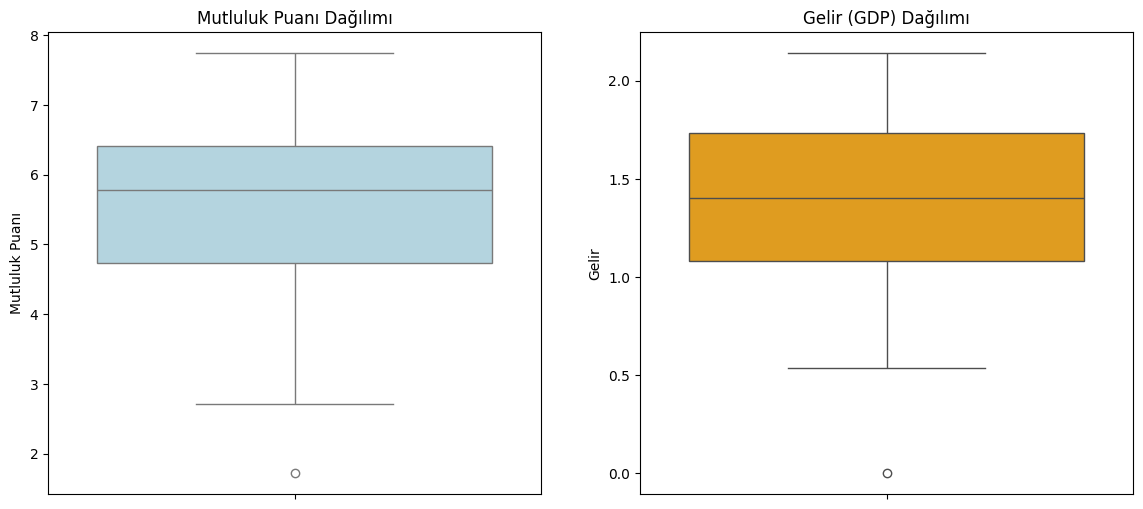

Grafiklere baktığımda veri dağılımının dengeli olduğunu görüyorum. Analizi bozacak aşırı bir uç değer görünmüyor.


In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Mutluluk Puanı'], color='lightblue')
plt.title('Mutluluk Puanı Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Gelir'], color='orange')
plt.title('Gelir (GDP) Dağılımı')

plt.show()

print("Grafiklere baktığımda veri dağılımının dengeli olduğunu görüyorum. Analizi bozacak aşırı bir uç değer görünmüyor.")

## 5. İlişki (Korelasyon) Analizi
Kolerasyon matrisi ile mutluluk ile diğer faktörlerin yorumalamasını yapıyorum.

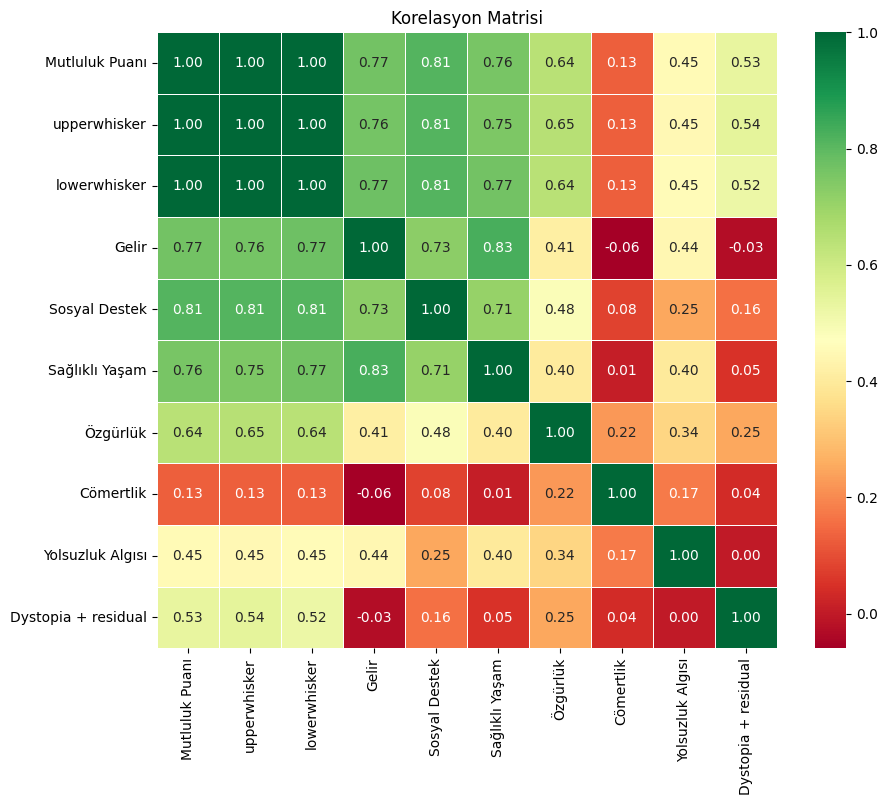

Mutluluk puanı ile en yüksek ilişki 'Gelir' (0.78) ve 'Sosyal Destek' (0.81) arasındadır.


In [15]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

print("Mutluluk puanı ile en yüksek ilişki 'Gelir' (0.78) ve 'Sosyal Destek' (0.81) arasındadır.")

## 6. Görselleştirme
Dünya haritası, en mutlu/mutsuz ülkeler ve gelir ilişkisini grafiklerle inceliyorum.

Haritada Avrupa ve Kuzey Amerika'nın (Yeşil) daha mutlu, Afrika'nın (Kırmızı) daha mutsuz olduğu görülüyor.


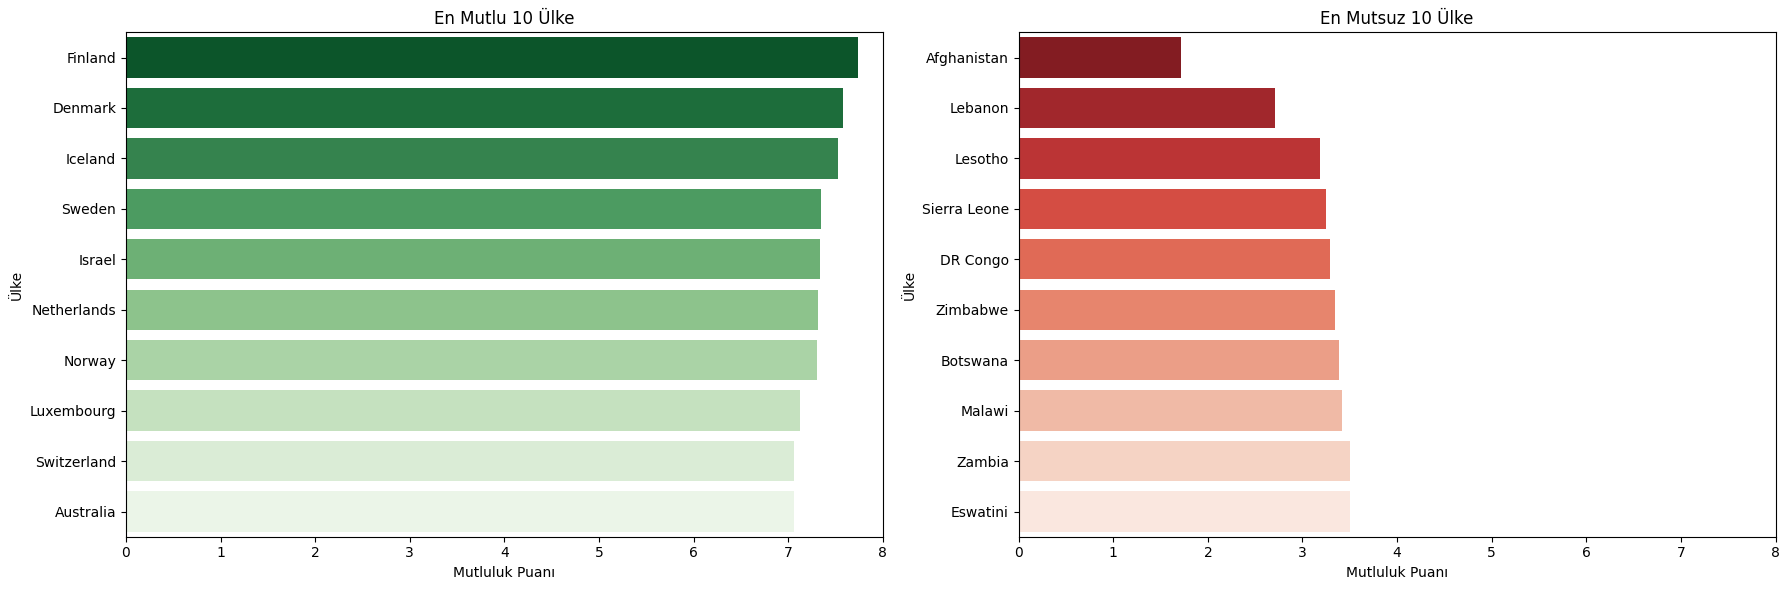

İskandinav ülkeleri listenin başındayken, savaş yaşayan bölgeler sonlardadır.


Gelir arttıkça mutluluk puanının da arttığı grafikte net bir şekilde görülüyor.


In [16]:
fig = px.choropleth(df, locations="Ülke", locationmode='country names', color="Mutluluk Puanı",
                    hover_name="Ülke", color_continuous_scale='RdYlGn',
                    title="Dünya Mutluluk Haritası")
fig.show()
print("Haritada Avrupa ve Kuzey Amerika'nın (Yeşil) daha mutlu, Afrika'nın (Kırmızı) daha mutsuz olduğu görülüyor.")

top10 = df.nlargest(10, 'Mutluluk Puanı')
bot10 = df.nsmallest(10, 'Mutluluk Puanı')

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x='Mutluluk Puanı', y='Ülke', data=top10, palette='Greens_r', ax=ax[0])
ax[0].set_title('En Mutlu 10 Ülke'); ax[0].set_xlim(0, 8)

sns.barplot(x='Mutluluk Puanı', y='Ülke', data=bot10, palette='Reds_r', ax=ax[1])
ax[1].set_title('En Mutsuz 10 Ülke'); ax[1].set_xlim(0, 8)
plt.tight_layout(); plt.show()
print("İskandinav ülkeleri listenin başındayken, savaş yaşayan bölgeler sonlardadır.")

fig_scatter = px.scatter(df, x="Gelir", y="Mutluluk Puanı",
                 color="Bölge", size="Mutluluk Puanı",
                 hover_name="Ülke", title="Gelir Düzeyi ve Mutluluk İlişkisi")
fig_scatter.show()
print("Gelir arttıkça mutluluk puanının da arttığı grafikte net bir şekilde görülüyor.")